# Case Study on Probability for Data Science

Problem Statement:
- To make a suitable machine learning algorithm to predict if the mushroom is
  edible or poisonous (e or p) using the given dataset.
- Along with other ML algorithms, Naïve Bayes’ Classifier should be applied.
- Also, if some data pre-processing is necessary do that as well.

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import the data

In [17]:
#Read the dataset
mus_data=pd.read_csv('mushrooms.csv')
pd.set_option('display.max_columns', None)
mus_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [4]:
mus_data.shape

(8124, 23)

In [10]:
mus_data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
mus_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

**The dataset consists of 8124 training examples, each representing a single mushroom. The first column is the target variable containing the class labels, identifying whether the mushroom is poisonous or edible. The remaining columns are 22 discrete features that describe the mushroom in some observable way; their values are encoded by characters.**

In [13]:
mus_data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

-**No Null values**

In [18]:
mus_data.describe(include= 'all')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [19]:
features_with_mul_values = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
for feature in features_with_mul_values:
    print(feature + ' Unique values:',len(mus_data[feature].unique()))
    print(mus_data[feature].value_counts())

class Unique values: 2
e    4208
p    3916
Name: class, dtype: int64
cap-shape Unique values: 6
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
cap-surface Unique values: 4
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
cap-color Unique values: 10
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64
bruises Unique values: 2
f    4748
t    3376
Name: bruises, dtype: int64
odor Unique values: 9
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
gill-attachment Unique values: 2
f    7914
a     210
Name: gill-attachment, dtype: int64
gill-spacing Unique values: 2
c    6812
w    1312
Name: gill-spacing, dtype: int64
gill-size Unique values: 2
b    5612
n    2512
Name: gill-size, dtype: int64
gill-color Unique values: 12
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     4

- Almost equal 'class' column values.
- The data description indicates that the feature stalk root has some missing values, denoted by ?.
- 'Veil type' contains only one value

In [20]:
## we can either drop the 'stalk-root' column or we could give mode value to them.
m=mus_data['stalk-root'].mode()[0]

In [21]:
## assigning mode value to the "?".
mus_data['stalk-root']=mus_data['stalk-root'].replace(to_replace ="?",value =m)

In [22]:
mus_data['stalk-root'].value_counts()

b    6256
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [23]:
mus_data=mus_data.drop(["veil-type"],axis=1)

### Exploratory Data Analytics

In [24]:
mus_data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

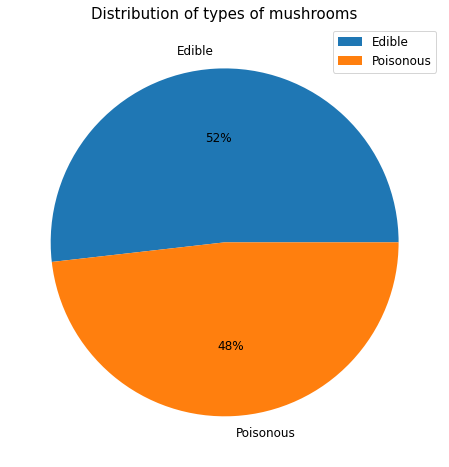

In [26]:
plt.figure(figsize=(8,8))
plt.title("Distribution of types of mushrooms",fontsize=15)
plt.pie(mus_data['class'].value_counts(), labels = ['Edible', 'Poisonous'], autopct='%.0f%%',textprops={'fontsize': 12})
plt.legend(('Edible', 'Poisonous'),loc="upper right",fontsize='large')
plt.show()

**From pie chart we can say that almost equal number of edible and poisonous mushrooms are there in dataset.**

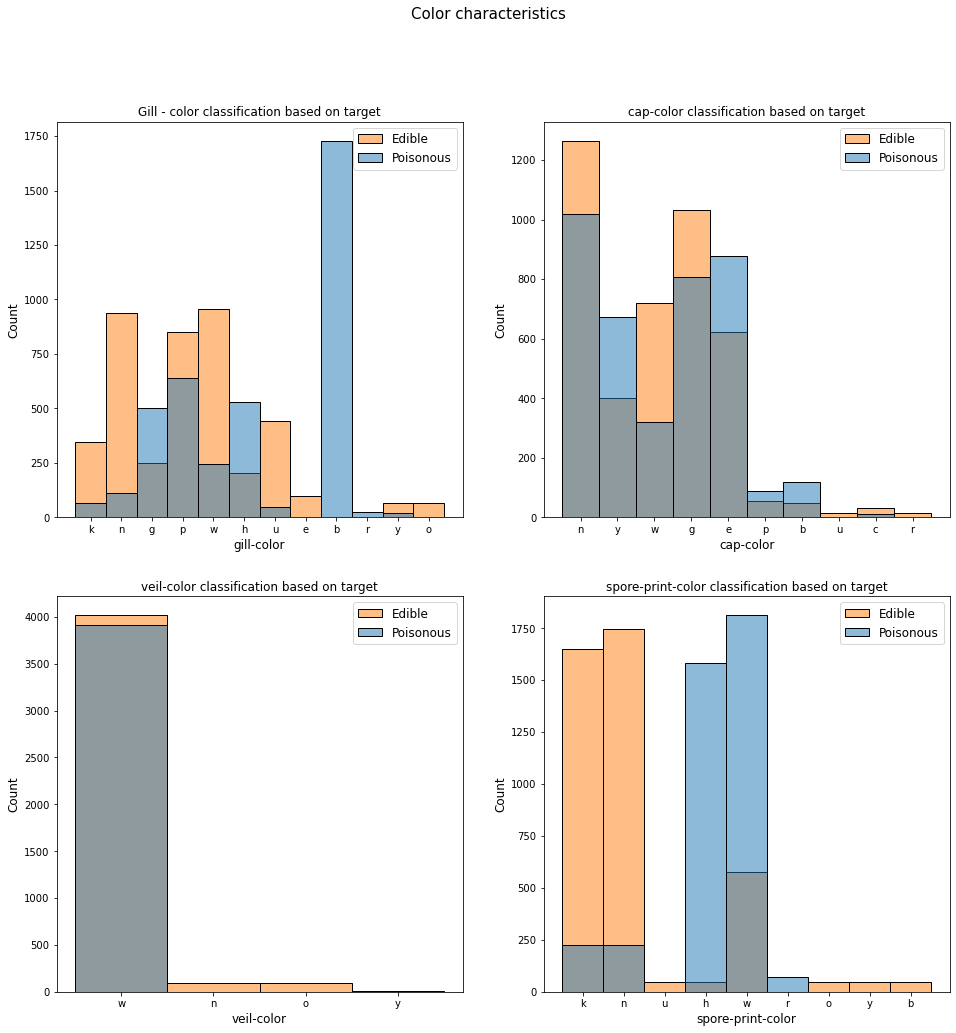

In [30]:
fig = plt.figure(figsize=(16,16))
plt.suptitle("Color characteristics",fontsize=15)
fig.tight_layout(pad=2)
plt.subplot(2,2,1)
plt.title("Gill - color classification based on target")
sns.histplot(data=mus_data, x="gill-color", hue="class", kde=False)
plt.legend(('Edible','Poisonous'),loc="upper right",fontsize='large')
plt.xlabel('gill-color',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.subplot(2,2,2)
plt.title("cap-color classification based on target")
sns.histplot(data=mus_data, x="cap-color", hue="class", kde=False)
plt.legend(('Edible','Poisonous'),loc="upper right",fontsize='large')
plt.xlabel('cap-color',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.subplot(2,2,3)
plt.title("veil-color classification based on target")
sns.histplot(data=mus_data, x="veil-color", hue="class", kde=False)
plt.legend(('Edible','Poisonous'),loc="upper right",fontsize='large')
plt.xlabel('veil-color',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.subplot(2,2,4)
plt.title("spore-print-color classification based on target")
sns.histplot(data=mus_data, x="spore-print-color", hue="class", kde=False)
plt.legend(('Edible','Poisonous'),loc="upper right",fontsize='large')
plt.xlabel('spore-print-color',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.show()

gill-colour : black=k, brown=n, buff=b, chocolate=h, grey=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
    
cap-colour : brown=n, buff=b, cinnamon=c, Gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
    
veil-colour : brown=n, orange=o, white=w, yellow=y
    
spore-print-colour : black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
    

From the graphs

- Poisonous mushrooms mostly contains Buff gill color and other colors in small numbers.
- Cap color is almost same for both the two types.
- Poisonous mushrooms dont have brown and orange veil colors.
- Poisonous mushrooms usually have chocolate, white, green colored spores on them.

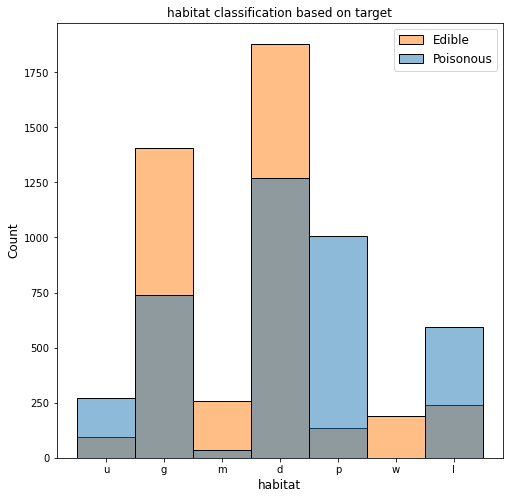

In [32]:
plt.figure(figsize=(8,8))
plt.title("habitat classification based on target")
sns.histplot(data=mus_data, x="habitat", hue="class", kde=False)
plt.legend(('Edible','Poisonous'),loc="upper right",fontsize='large')
plt.xlabel('habitat',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w,
woods=d
- Poisonous mushrooms are usually found in urban, leaves, and on paths.

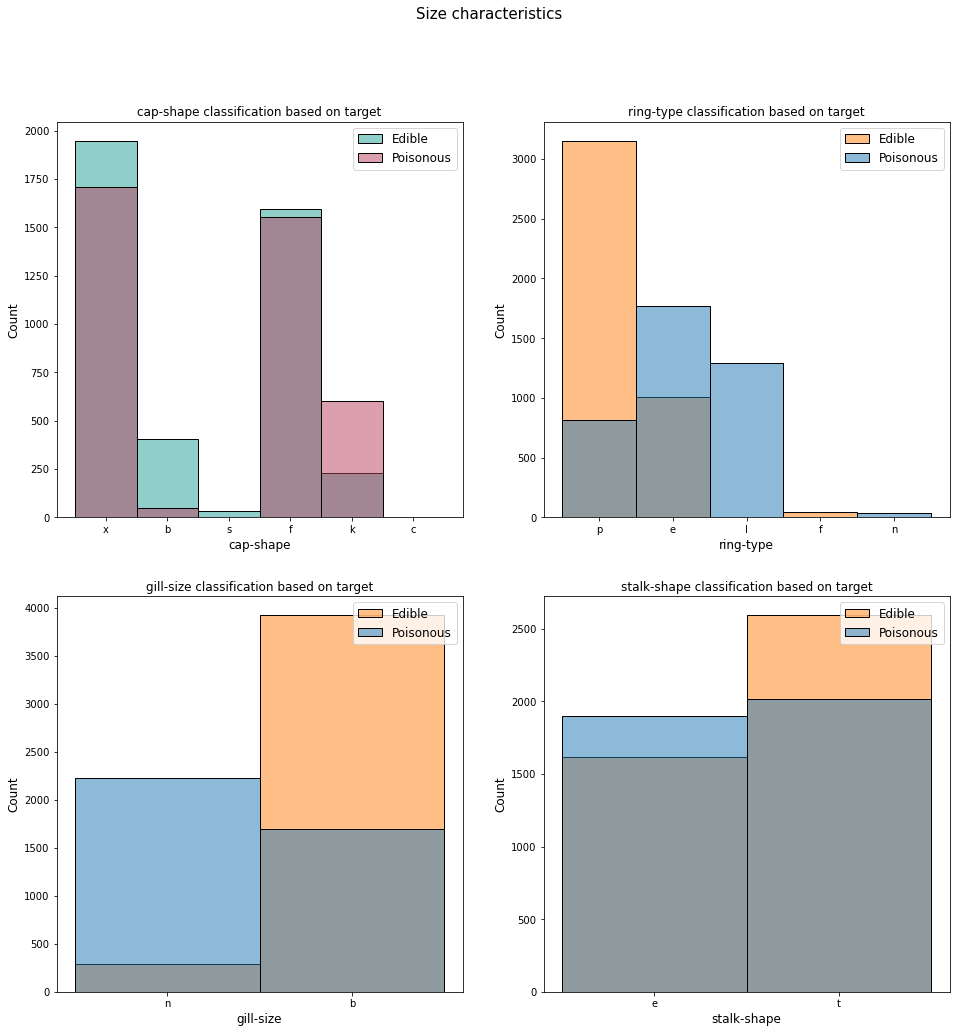

In [33]:
fig = plt.figure(figsize=(16,16))
plt.suptitle("Size characteristics",fontsize=15)
fig.tight_layout(pad=2)
plt.subplot(2,2,1)
plt.title("cap-shape classification based on target")
sns.histplot(data=mus_data, x="cap-shape", hue="class", kde=False,palette = ['#B8405E','#219F94'])
plt.legend(('Edible','Poisonous'),loc="upper right",fontsize='large')
plt.xlabel('cap-shape',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.subplot(2,2,2)
plt.title("ring-type classification based on target")
sns.histplot(data=mus_data, x="ring-type", hue="class", kde=False)
plt.legend(('Edible','Poisonous'),loc="upper right",fontsize='large')
plt.xlabel('ring-type',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.subplot(2,2,3)
plt.title("gill-size classification based on target")
sns.histplot(data=mus_data, x="gill-size", hue="class", kde=False)
plt.legend(('Edible','Poisonous'),loc="upper right",fontsize='large')
plt.xlabel('gill-size',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.subplot(2,2,4)
plt.title("stalk-shape classification based on target")
sns.histplot(data=mus_data, x="stalk-shape", hue="class", kde=False)
plt.legend(('Edible','Poisonous'),loc="upper right",fontsize='large')
plt.xlabel('stalk-shape',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.show()

cap-shape : bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
    
ring-type : cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
    
gill-size : broad=b, narrow=n
    
stalk-shape : enlarging=e, tapering=t
    

From graph:

- Poisonous mushrooms are usually seen with flat and knobbed cap shapes.
- Edible mushrooms are having pendant, evanescent, flaring ring types.
- Edible mushrooms usually have broad gill size whereas Poison ones are having narrow gill size.
- Both types of mushrooms are almost equally seen with enlarging and tapering stalk.

### Label Encoding

In [36]:
#LabelEncoder
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in mus_data.columns:
    mus_data[column] = labelencoder.fit_transform(mus_data[column])

In [37]:
## assigning x and y
x=mus_data.drop(['class'],axis=1)
y=mus_data['class']

In [38]:
## Data spliting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

### Classification Methods

In [39]:
accl=[]

### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

D:\data science\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score

print("accuracy is :",accuracy_score(y_test,y_pred))
print("F1 - score :",f1_score(y_test,y_pred))
accl.append(['Logistic Regression',round(accuracy_score(y_test,y_pred),2)])

accuracy is : 0.9538461538461539
F1 - score : 0.9521988527724665


In [42]:
confusion_matrix(y_test,y_pred)

array([[803,  40],
       [ 35, 747]], dtype=int64)

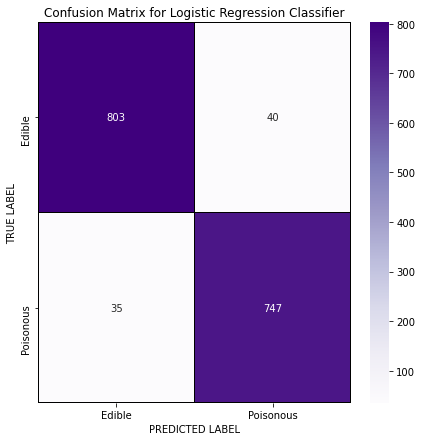

In [44]:
cm = confusion_matrix(y_test, y_pred)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
#plt.savefig("lrcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

### KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier
acc_val=[]
neighbors=np.arange(3,15)
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_val.append(acc)

Text(0, 0.5, 'accuracy')

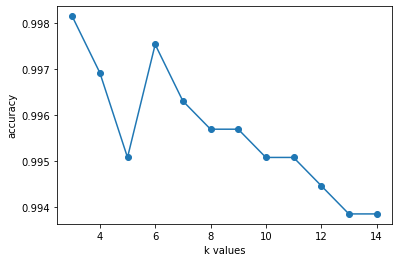

In [46]:
plt.plot(neighbors,acc_val,'o-')
plt.xlabel('k values')
plt.ylabel("accuracy")

In [47]:
knn=KNeighborsClassifier(n_neighbors=2,metric='minkowski')
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [48]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("F1 - score :",f1_score(y_test,y_pred))
accl.append(['KNN',round(accuracy_score(y_test,y_pred),2)])

accuracy is : 0.9993846153846154
F1 - score : 0.9993610223642173


In [49]:
confusion_matrix(y_test,y_pred)

array([[842,   1],
       [  0, 782]], dtype=int64)

### Decision Tree Classification

In [50]:
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

y_pred = dt_model.predict(x_test)

In [51]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("F1 - score :",f1_score(y_test,y_pred))
accl.append(['DecisionTreeClassifier',round(accuracy_score(y_test,y_pred),2)])

accuracy is : 1.0
F1 - score : 1.0


### Gradient Booster

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
gm=GradientBoostingClassifier()
gm.fit(x_train,y_train)

y_pred=gm.predict(x_test)

In [53]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("F1 - score :",f1_score(y_test,y_pred))
accl.append(['Gradient Boosting Classifier',round(accuracy_score(y_test,y_pred),2)])

accuracy is : 1.0
F1 - score : 1.0


### Gaussian Naive Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [56]:
y_pred=classifier.predict(x_test)

In [58]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test,y_pred))
print("F1 - score :",f1_score(y_test,y_pred))
accl.append(['Gaussian Naive Bayes',round(accuracy_score(y_test,y_pred),2)])
cm

0.9027692307692308
F1 - score : 0.8993630573248407


array([[761,  82],
       [ 76, 706]], dtype=int64)

### Bernoulli Naive Bayes

In [60]:
from sklearn.naive_bayes import BernoulliNB
classifier2=BernoulliNB()
classifier2.fit(x_train,y_train)
y_pred=classifier2.predict(x_test)

In [61]:
cm2=confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test,y_pred))
print("F1 - score :",f1_score(y_test,y_pred))
accl.append(['Bernoulli Naive Bayes',round(accuracy_score(y_test,y_pred),2)])
cm2

0.8424615384615385
F1 - score : 0.817923186344239


array([[794,  49],
       [207, 575]], dtype=int64)

### Radial SVM

In [62]:
from sklearn.svm import SVC
svm_radial=SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
y_pred=svm_radial.predict(x_test)

In [63]:
cm2=confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test,y_pred))
print("F1 - score :",f1_score(y_test,y_pred))
accl.append(['Radial SVM',round(accuracy_score(y_test,y_pred),2)])
cm2

0.9932307692307693
F1 - score : 0.9929351316634554


array([[841,   2],
       [  9, 773]], dtype=int64)

### Polynomial SVM

In [64]:
from sklearn.svm import SVC
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)
y_pred=svm_poly.predict(x_test)

In [65]:
print(accuracy_score(y_test,y_pred))
print("F1 - score :",f1_score(y_test,y_pred))
accl.append(['polynomial SVM',round(accuracy_score(y_test,y_pred),2)])

1.0
F1 - score : 1.0


### Linear SVM

In [66]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [67]:
print(accuracy_score(y_test,y_pred))
print("F1 - score :",f1_score(y_test,y_pred))
accl.append(['Linear SVM',round(accuracy_score(y_test,y_pred),2)])

0.976
F1 - score : 0.9751750477402928


In [68]:
df=pd.DataFrame(accl, columns =['Algorithms', 'Accuracy'])

In [69]:
df.sort_values(by='Accuracy',ascending=False)

,Algorithms,Accuracy
1,KNN,1.00
2,DecisionTreeClassifier,1.00
3,Gradient Boosting Classifier,1.00
7,polynomial SVM,1.00
6,Radial SVM,0.99
8,Linear SVM,0.98
0,Logistic Regression,0.95
4,Gaussian Naive Bayes,0.90
5,Bernoulli Naive Bayes,0.84


### Conclusion

On testing various algorithms for classifying the whether the mushrooms were edible or poisonous using the given dataset, we found that most of the classification methods hit 100% accuracy with this dataset.So our final model can be made by any of these algorithms.